In [46]:
%pip install tensorflow tensorflow-gpu opencv-python matplotlib
%pip list

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [39 lines of output]
      Traceback (most recent call last):
        File "c:\Users\bdbag\anaconda3\envs\dev\lib\site-packages\setuptools\_vendor\packaging\requirements.py", line 35, in __init__
          parsed = _parse_requirement(requirement_string)
        File "c:\Users\bdbag\anaconda3\envs\dev\lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 64, in parse_requirement
          return _parse_requirement(Tokenizer(source, rules=DEFAULT_RULES))
        File "c:\Users\bdbag\anaconda3\envs\dev\lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 82, in _parse_requirement
          url, specifier, marker = _parse_requirement_details(tokenizer)
        File "c:\Users\bdbag\anaconda3\envs\dev\lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 126, in _parse_requirement_details
          marker = _parse_requirement_marker(
       

Package                       Version
----------------------------- ---------------
absl-py                       2.1.0
aiobotocore                   2.5.0
aiofiles                      22.1.0
aiohttp                       3.8.5
aioitertools                  0.7.1
aiosignal                     1.2.0
aiosqlite                     0.18.0
alabaster                     0.7.12
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
astunparse                    1.6.3
async-timeout                 4.0.2
atomicwrites                  1.4.0
attrs                         22.1.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.11.0
backcall                      0.2.0
bcrypt                        3.2.0
beautiful

In [47]:
# Import Dependencies
import tensorflow as tf
import os
import cv2
import imghdr
import matplotlib.pyplot as plt

In [51]:
# Verifying correct data separation
os.listdir('chest_xray/train')
os.listdir('chest_xray/test')

['NORMAL', 'PNEUMONIA']

In [52]:
# Checking image size
img = cv2.imread(os.path.join('chest_xray', 'train', 'NORMAL', 'NORMAL-28501-0001.jpeg'))
img.shape

(2418, 2434, 3)

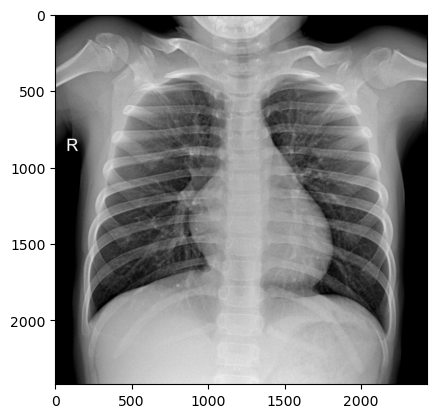

In [ ]:
# Example image
plt.imshow(img)

In [59]:
train_data = tf.keras.utils.image_dataset_from_directory('chest_xray','train', batch_size=32)
validation_data = train_data.take(int(len(train_data) * 0.3))
test_data = tf.keras.utils.image_dataset_from_directory('chest_xray','test', batch_size=32)


ValueError: `labels` argument should be a list/tuple of integer labels, of the same size as the number of image files in the target directory. If you wish to infer the labels from the subdirectory names in the target directory, pass `labels="inferred"`. If you wish to get a dataset that only contains images (no labels), pass `labels=None`. Received: labels=train

In [ ]:
data_iterator = train_data.as_numpy_iterator()

In [ ]:
# Getting a batch of data
batch = data_iterator.next()
batch[0].shape

(32, 256, 256, 3)

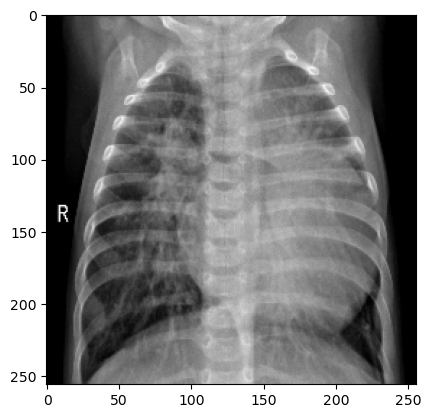

In [ ]:
plt.imshow(batch[0][0].astype('int'))

In [ ]:
# 1 = Pneumonia, 0 = Normal? (Will Double Check Later)
batch[1]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

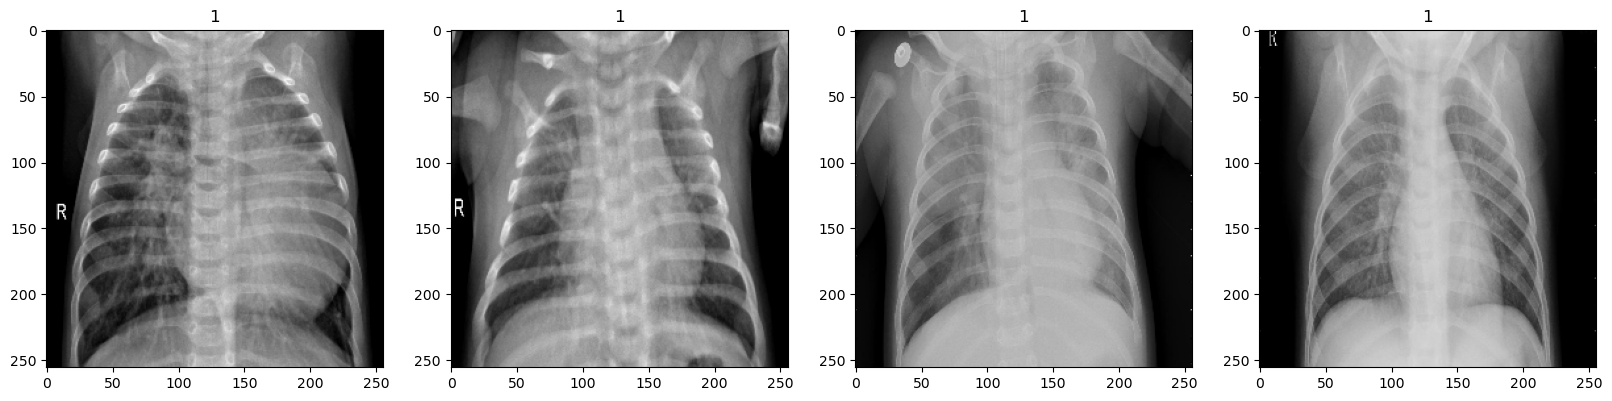

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype('int'))
    ax[idx].set_title(batch[1][idx])

In [ ]:
batch[0].min(), batch[0].max()

(0.0, 255.0)

In [ ]:
scaled = batch[0] / 255

In [ ]:
scaled.min(), scaled.max()

(0.0, 1.0)

# PreProcessing

In [ ]:
preprocess_data = train_data.map(lambda x, y: (x/255, y))

In [ ]:
preprocess_data.as_numpy_iterator().next()[0].max()

1.0

In [ ]:
len(preprocess_data)

164